# Chapter 3 基本的な演算

In [9]:
from sympy import *
init_printing() #出力結果をキレイにするため
x, y, z = symbols('x y z')

ここでは基本的な計算の方法を扱う. 

**Tips**
これ以降変数の定義はチュートリアルに沿って行うが、以下のように宣言すれば、いちいち(`symbols`を用いた変数宣言を)しなくて済む.

In [7]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


===> よく用いられる以下のものが自動的に読み込まれている.

- `from __future__ import division` : `Python2`で割り算が`Python3`と同じものになる.
- `from sympy import *` : すべてのSymPyオブジェクト(関数)をインポート
- `x, y, z, t` : 変数
- `k, m, n` : 整数(和の添字として)
- `f, g, h` : 関数の名前
- `init_printing()` : 表記を環境に応じて最適なものにする. jupyter notebook上ならLaTeXライクなものにする

## 3.1 代入

*SymPy*シンボルに関する代入は前章でも扱ったが、式を定義する順番を気にする必要があった. それを気にする必要がない方法として`subs`関数を用いる方法がある.

##### 値を代入する

In [10]:
expr = cos(x) + 1

In [13]:
expr.subs({x:y}) #subsメソッド: xにyを代入する.

In [12]:
expr.subs(x, y) 

`y = 0`(つまり `x = 0`) での評価は

In [4]:
expr.subs(x, 0)

##### 式を代入する

また$$x^{x^{x^{x}}}$$

のようなものはどうすればよいか. ---> `x`として、`y`を`x**y`で置き換えてやれば良い.

In [5]:
expr = x**y

In [6]:
expr

In [7]:
expr = expr.subs(y, x**y)

In [8]:
expr

In [9]:
expr = expr.subs(y, x**x)

In [10]:
expr

##### 特定の関数・変数のみで書き換えたい

In [7]:
expr = sin(2*x) + cos(2*x)

In [8]:
expand_trig(expr) #expand_trig関数を使って三角関数を展開

In [9]:
expr.subs(sin(2*x), 2*sin(x)*cos(x)) #sin(2x)を2sin(x)cos(x)に置き換える.

詳しい`SymPy`関数についてはChapter 5にて述べる.

**注意** *`Sympy`シンボルは`immutable`*

In [14]:
expr = cos(x)

In [14]:
expr.subs(x, 0) #x=0をexprへ代入

In [16]:
expr

--->値を代入しても、最初の式`expr = cos(x)`は変更を受けていない. (`Python`でのsort, sorted関数と同様に考えれば良い.)

つまり`Sympy`での代入操作`subs()`はオリジナルの値を変数へ入れるのではなく、**`expr`のコピー**に代入操作`subs(x, 0)`を行い、出力していると考えれば良い。

In [17]:
x

--->値`x = 0`を代入した変数だが、変更を受けていない.

#### 幾つかの代入を一度に行う

In [11]:
expr = x**3 + 4*x*y - z

In [14]:
expr.subs([(x, 2), (y, 4), (z, 0)]) #引数はこのようにリストでも与えることができるし、

In [15]:
expr.subs({x:2, y:4, z:0}) #辞書として与えることもできる.

代入したい変数がたくさんあるとき

[**例**] $$x^4 - 4x^3 + 4x^2 - 2x + 3$$の*偶数べき*の`x`を`y`に置き換えたい:

In [18]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3

In [19]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]

In [21]:
expr.subs(replacements)

## 3.2 文字列をSympyの表式に変換する

関数`sympify()`は文字列を`Sympy`オブジェクトに変換する。

たとえば`input`関数でユーザー入力を受け付けて式を変数`str_expr`に代入したとすると、その時点では以下のように文字列で認識されている.

In [22]:
str_expr = 'x**2 + 3*x - 1/2'

In [23]:
type(str_expr)

str

In [24]:
str_expr

'x**2 + 3*x - 1/2'

In [25]:
str_expr.subs(x, 2) #str_exprは単なる文字列なので代入操作不可能

AttributeError: 'str' object has no attribute 'subs'

In [27]:
expr = sympify(str_expr) #Sympyオブジェクトに変換

In [28]:
type(expr)

sympy.core.add.Add

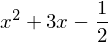

In [29]:
expr

In [30]:
expr.subs(x, 2) #xがSympyオブジェクトとして扱えるようになり、代入操作も可能になる.

##### 浮動小数点数に変換する

ここではこれまで扱ってきた数式の数値評価を考える.

In [31]:
expr = sqrt(8)

In [32]:
expr

In [33]:
expr.evalf() #evalf()メソッド

`evalf()`の引数には、欲しい桁を与えられる. デフォルトでは15桁. 100桁ほしいなら

In [27]:
pi.evalf(10e2)

浮動小数点数が欲しい時は、`subs`で表式に代入してから`evalf`を使えば良い。
一つの式として表せば

In [35]:
expr = cos(2*x)

In [36]:
expr.evalf(subs={x:2.4})

とすればよい。

*コメント* `expr.evalf()`オブジェクトの引数に注意. 桁数ではない.)

*Tips*: 全体の精度に響かない値を、単に切り捨てたいときがある. たとえば

In [37]:
one = cos(1)**2 + sin(1)**2

In [38]:
(one - 1).evalf()

なんかは、全体の精度に対してほとんど無視して良いといえる. そこで

In [39]:
(one-1).evalf(chop=True)

と、`chop`フラグをつければ無事小数点以下を切り捨てられる.

## 3.3 Lambdify

たくさんの点で、式を評価したいときは、もっと簡単な方法がある. -->数千個の点になってくると`Sympy`だと遅いので、`Numpy`とか`SciPy`を使うべき.

In [41]:
help(lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=True)
    Returns a lambda function for fast calculation of numerical values.
    
    If not specified differently by the user, SymPy functions are replaced as
    far as possible by either python-math, numpy (if available) or mpmath
    functions - exactly in this order. To change this behavior, the "modules"
    argument can be used. It accepts:
    
     - the strings "math", "mpmath", "numpy", "numexpr", "sympy"
     - any modules (e.g. math)
     - dictionaries that map names of sympy functions to arbitrary functions
     - lists that contain a mix of the arguments above, with higher priority
       given to entries appearing first.
    
    The default behavior is to substitute all arguments in the provided
    expression with dummy symbols. This allows for applied functions (e.g.
    f(t)) to be supplied as arguments. Call the function with dumm

##### Numpy

In [29]:
import numpy #numpyを呼び出すためインポートする.

In [33]:
a = numpy.arange(10) #Numpyでのリスト(10個)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
f = lambdify(x, sin(x), 'numpy') #numpyをバックエンドで呼び出して計算させる. 第２引数に関数を持ってくる.

In [32]:
f(a) #引数はnumpyオブジェクト

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

--->関数値が格納できている.

##### 標準ライブラリmath

In [37]:
f = lambdify(x, sin(x), 'math')

In [38]:
f(0.1)

##### 自分で関数を定義する

In [47]:
def mysin(x):
    '''
    My sine. Note that this is only accurate for small x.
    '''
    return x

In [48]:
f = lambdify(x, expr, {'sin':mysin})

In [49]:
f(0.1)

次は[Chapter4 Printing](https://hiroyuki827.github.io/SymPy_tutorial/Chapter4_Printing.html)へ!